# Load Packages


In [196]:
from re import S
import pandas as pd 
import regex as re
from sklearn.inspection import permutation_importance
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
import time
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import datetime as dt
from datetime import date,datetime,timedelta
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import \
    StandardScaler, PolynomialFeatures,Normalizer
from sklearn.metrics import mean_squared_error




# Clean Data / Run Base Model


In [181]:
df = pd.read_csv("~/Desktop/full_data_grailed.csv")
print(df.columns)

def cleaner(df):
    #clean color column
    df['color'] = df['color'].str.replace('Color:','').str.lower()
    df['color'] = np.where(df['color'].str.findall('green'),'green',
                       np.where(df['color'].str.findall('red|cherry|maroon|crimson|coral'),'red',
                       np.where(df['color'].str.findall('blue|navy|marine|denim|aqua|aztec'),'blue',
                       np.where(df['color'].str.findall('purple|plum|violet'),'purple',
                       np.where(df['color'].str.findall('brown|chocolate|burgundy|beige|khaki|coffee|walnut|earth'),'brown',
                       np.where(df['color'].str.findall('neon'),'neon',
                       np.where(df['color'].str.findall('military|camo|camofla'),'military',
                       np.where(df['color'].str.findall('multi'),'multicolor',
                       np.where(df['color'].str.findall('floral'),'floral',
                       np.where(df['color'].str.findall('faded'),'faded',
                       np.where(df['color'].str.findall('plaid'),'plaid',
                       np.where(df['color'].str.findall('stripe|stripes'),'strip',
                       np.where(df['color'].str.findall('plad'),'plad',
                       np.where(df['color'].str.findall('pink|salmon|peach'),'pink',
                       np.where(df['color'].str.findall('white|cream|clay|tan|oatmeal'),'white',
                       np.where(df['color'].str.findall('black|charcoal|onix'),'black',
                       np.where(df['color'].str.findall('orange|rust'),'orange',
                       np.where(df['color'].str.findall('teal'),'teal',
                       np.where(df['color'].str.findall('grey|silver'),'grey',
                       np.where(df['color'].str.findall('yellow|mustard|'),'yellow', 
                       np.where(df['color'].str.findall('green|olive|turqouise|turqoise|seafoam|sage'),'green','color Not listed')))))))))))))))))))))
    #clean size column
    df['size'] =       np.where(df['size_list'].str.findall('\sXXL'),'XXL',
                       np.where(df['size_list'].str.findall('\sXL'),'XL',
                       np.where(df['size_list'].str.findall('\sM'),'M',
                       np.where(df['size_list'].str.findall('\sS'),'S',
                       np.where(df['size_list'].str.findall('\sL'),'L',
                       np.where(df['size_list'].str.findall('\sXXXL'),'XXXL',
                       np.where(df['size_list'].str.findall('\sONE SIZE'),'One Size','Size Not listed')))))))
    df['title'] = df['title'].str.lower()
#clean type column 
    df['type_clean'] = np.where(df['title'].str.findall('\svest'),'vest',
                       np.where(df['title'].str.findall('\sjacket|jacket|\spuffer|\swindbreaker|\swind|wind|\sshell'),'jacket',
                       np.where(df['title'].str.findall('\sfleece|\sflecee|\ssynchilla|synchilla'),'fleece',
                       np.where(df['title'].str.findall('\shat|\scap|\shead|\sheadwear'),'hat',
                       np.where(df['title'].str.findall('\spant|\strousers|\strouser|\ssweatpants'),'pant',
                       np.where(df['title'].str.findall('\spants'),'pant',
                       np.where(df['title'].str.findall('\sbeanie'),'beanie',
                       np.where(df['title'].str.findall('\sflannel'),'flannel',
                       np.where(df['title'].str.findall('\sglove'),'glove',                      
                       np.where(df['title'].str.findall('\sshorts'),'shorts',
                       np.where(df['title'].str.findall('\sjeans'),'jeans',
                       np.where(df['title'].str.findall('\sparka'),'parka',
                       np.where(df['title'].str.findall('\sshirt'),'shirt',
                       np.where(df['title'].str.findall('\st-shirt|\stshirt|s\short sleeve'),'shirt',
                       np.where(df['title'].str.findall('\st'),'shirt',
                       np.where(df['title'].str.findall('\stee'),'shirt',
                       np.where(df['title'].str.findall('\spullover|\spull over'),'pullover',
                       np.where(df['title'].str.findall('\ssneaker|\sshoe|\sshoes|\sboots|\sboot'),'shoes',
                       np.where(df['title'].str.findall('\sbag|\stote'),'bag',
                       np.where(df['title'].str.findall('\sbackpack'),'backpack',
                       np.where(df['title'].str.findall('\shoodie|\ssweatshirt|\shoody'),'sweatshirt',
                       np.where(df['title'].str.findall('\slong sleeve|\sturtleneck|\slongsleeve'),'long sleeve shirt',
                       np.where(df['title'].str.findall('\sbutton'),'dress shirt',
                       np.where(df['title'].str.findall('\spolo'),'polo shirt',                     
                       np.where(df['title'].str.findall('\stee'),'shirt',
                       np.where(df['title'].str.findall('\sdenim'),'jeans',
                       np.where(df['title'].str.findall('\ssweater|sweater|\scardigan'),'sweater',
                       np.where(df['title'].str.findall('\scoat'),'jacket','Clothing Not listed'))))))))))))))))))))))))))))
    
    df['item_description'] = df['item_description'].str.lower()
    df['vintage'] = np.where(df['title'].str.contains('vintage'),1,
                    np.where(df['item_description'].str.contains('vintage'),1,0))
    df['patagonia_flag'] = np.where(df['title'].str.contains('patagonia'),1,0)
    df['nike_flag'] = np.where(df['title'].str.contains('nike'),1,0)
    df['ll_bean_flag'] = np.where(df['title'].str.contains('arcteryx|arc-teryx|arc teryx'),1,0)
    df['arcteryx_flag'] = np.where(df['title'].str.contains('ll bean|ll_bean|l.l. bean|l.l.'),1,0)
    df['columbia_flag'] = np.where(df['title'].str.contains('columbia'),1,0)
    df['champion_flag'] = np.where(df['title'].str.contains('champion'),1,0)
    df['stussy_flag'] = np.where(df['title'].str.contains('stussy'),1,0)
    df['north_face_flag'] = np.where(df['title'].str.contains('north face|north_face'),1,0)
    df['gap_flag'] = np.where(df['title'].str.contains('gap'),1,0)
    df['adidas_flag'] = np.where(df['title'].str.contains('adidas'),1,0)
    df['helly_hanson_flag'] = np.where(df['title'].str.contains('uniqlo'),1,0)
    df['rei_flag'] = np.where(df['title'].str.contains('rei'),1,0)    
    df['uniqlo_flag'] = np.where(df['title'].str.contains('helly hanson|hh'),1,0)
    df['tommy-hilfiger_flag'] = np.where(df['title'].str.contains('tommy hilfiger'),1,0)      
    df['fila_flag'] = np.where(df['title'].str.contains('fila'),1,0)      
    df['2000s_flag'] = np.where(df['title'].str.contains('0\ds|0\d\'s|00s|00\'s|2000|2000s|2000\'s|200\d|200\ds|200\d\'s|20\d\d|20\d\ds|20\d\d\'s'),1,0)  
    df['90s_flag'] = np.where(df['title'].str.contains('\'90\'s|\'90s|90s|1990\'s|1990s|1990|90'),1,0)
    df['80s_flag'] = np.where(df['title'].str.contains('\'80\'s|\'80s|80s|1980\'s|1980s|1980|80'),1,0)
    df['70s_flag'] = np.where(df['title'].str.contains('\'70\'s|\'70s|70s|1970\'s|1970s|1970|70'),1,0)
    df['rare_flag'] = np.where(df['title'].str.contains('rare'),1,0)
    df['organic_flag'] = np.where(df['title'].str.contains('organic'),1,0)
    df['mens_flag'] = np.where(df['title'].str.contains('mens|men\'s'),1,0)
    df['womens_flag'] = np.where(df['title'].str.contains('womens|women\'s'),1,0)
    df['nylon_flag'] = np.where(df['title'].str.contains('nylon'),1,0)
    df['retro_flag'] = np.where(df['title'].str.contains('retro'),1,0)
    df['flannel_flag'] = np.where(df['title'].str.contains('flannel'),1,0)
    df['plad_flag'] = np.where(df['title'].str.contains('plad'),1,0)
    df['mesh_flag'] = np.where(df['title'].str.contains('mesh'),1,0)
    df['nautica_flag'] = np.where(df['title'].str.contains('nautica'),1,0)
    df['tech_flag'] = np.where(df['title'].str.contains('tech'),1,0)
    df['multi_brand_flag'] = np.where(df['title'].str.contains('[a-z]\sx\s[a-z]'),1,0)
    df['pile_flag'] = np.where(df['title'].str.contains('pile'),1,0)
    df['japanese_flag'] = np.where(df['title'].str.contains('japan|japanese'),1,0)
    df['usa_flag'] = np.where(df['title'].str.contains('u.s.a|usa|us|united states|america'),1,0)
    df['repaired_flag'] = np.where(df['title'].str.contains('repaired'),1,0)
    df['distressed_flag'] = np.where(df['title'].str.contains('distressed'),1,0)
    df['goretex_flag'] = np.where(df['title'].str.contains('goretex'),1,0)
    df['carhartt_flag'] = np.where(df['title'].str.contains('carhartt'),1,0)
    df['mammut_flag'] = np.where(df['title'].str.contains('mammut'),1,0)
    df['synchilla_flag'] = np.where(df['title'].str.contains('synchilla'),1,0)
    df['down_flag'] = np.where(df['title'].str.contains('goose|down'),1,0)
    df['fish_flag'] = np.where(df['title'].str.contains('fish'),1,0)
    df['corduroy_flag'] = np.where(df['title'].str.contains('corduroy'),1,0)
    df['5_panel_flag'] = np.where(df['title'].str.contains('5 panel|5-panel|five panel'),1,0)
    df['winter_flag'] = np.where(df['title'].str.contains('winter'),1,0)
    df['fall_flag'] = np.where(df['title'].str.contains('fall'),1,0)
    df['summer_flag'] = np.where(df['title'].str.contains('summer'),1,0)
    df['spring_flag'] = np.where(df['title'].str.contains('spring'),1,0)




    #CLEAN COLOR
    #CLEAN CONDITION
    df['condition'] = df['condition'].str.replace('Condition: ','')
    #CLEAN TRANSACTIONS
    df['seller_transactions'] = df['seller_transactions'].str.replace('-','')
    #CLEAN FEEDBACK
    df['seller_feedback'] = df['seller_feedback'].str.replace('Feedback','')
    #CLEAN LISTINGS
    df['seller_listings'] = df['seller_listings'].str.replace('[a-zA-Z]','')
    #CLEAN SHIPPING COSTS
    df['shipping_cost'] = df['shipping_cost'].str.replace('[~\d]','')
    #CLEAN PRICE
    df['new_price'] = df['new_price'].fillna(0)
    df['new_price'] = df['new_price'].str.replace('$','')
    df['price'] = df['price'].fillna(0)
    df['price'] = df['price'].str.replace('$','')
    df['new_price'] = np.where(df['new_price'].isna()==True,df['price'],df['new_price'])
    return df 
# for i in df['title'][df['type_clean']=='Clothing Not listed']:
#     print(i)
df = cleaner(df)
ml_df = df.copy()

ml_df = ml_df[['color','condition','seller_feedback','new_price','seller_listings',
'vintage','type_clean','size','likes','shipping_cost']].fillna(0)
# autoencoding categorical features
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

features_to_encode = ['color','condition','size','type_clean']
for feature in features_to_encode:
    res = encode_and_bind(ml_df, feature)
res = encode_and_bind(res,'size')
res = encode_and_bind(res,'color')
res = encode_and_bind(res,'condition')


X = res.drop(columns = 'new_price')
X = X.astype('float')
Y = res['new_price']
Y = Y.astype('float')



Index(['Unnamed: 0', 'designer_cat', 'clothing_type_master', 'size_list',
       'color', 'price', 'title', 'condition', 'shipping_from', 'seller_name',
       'seller_transactions', 'seller_feedback', 'seller_listings',
       'like_amount', 'number_of_photos', 'new_price', 'seller_rating',
       'item_description', 'likes', 'shipping_cost'],
      dtype='object')


/var/folders/h9/cb__p_gs15qgxfg4b6n7m2gr0000gn/T/ipykernel_49866/4059941419.py:78: FutureWarning: The default value of regex will change from True to False in a future version.
  df['seller_listings'] = df['seller_listings'].str.replace('[a-zA-Z]','')
/var/folders/h9/cb__p_gs15qgxfg4b6n7m2gr0000gn/T/ipykernel_49866/4059941419.py:81: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['new_price'] = df['new_price'].str.replace('$','')
/var/folders/h9/cb__p_gs15qgxfg4b6n7m2gr0000gn/T/ipykernel_49866/4059941419.py:83: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$','')


## Scaling Continuose / Remove Bad Features

In [188]:
# poly = PolynomialFeatures(degree=2,interaction_only=True)
# X_poly = pd.DataFrame(poly.fit_transform(X))
# X_poly= X_poly.reset_index(drop=True,inplace=False)
# #concat back
# X_total= pd.concat([X,X_poly],axis=1)


scaler = MinMaxScaler()
X['seller_feedback'] = scaler.fit_transform(X['seller_feedback'].values.reshape(-1,1))
X['seller_listings'] = scaler.fit_transform(X['seller_listings'].values.reshape(-1,1))


validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)



## Inital Model / Feature Importance

95.98432078498882


<AxesSubplot:>

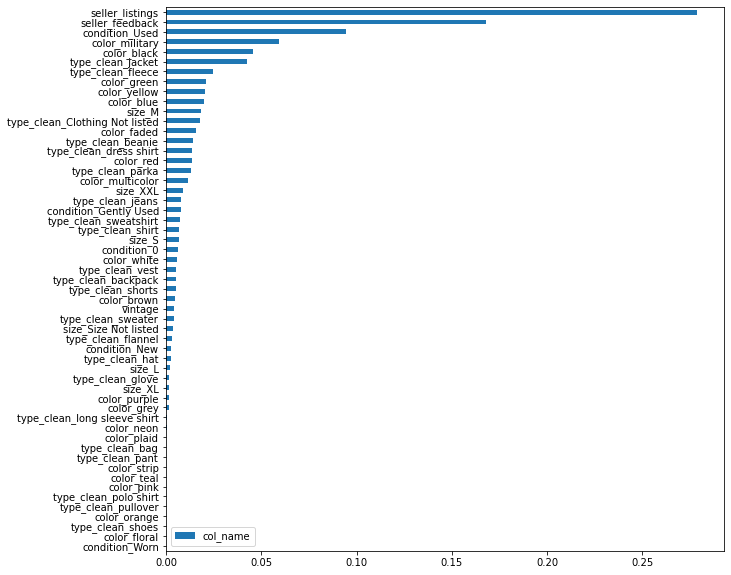

In [189]:
clf = ensemble.GradientBoostingRegressor()
clf.fit(X_train,Y_train)
predictions = clf.predict(X_validation)
print(mean_squared_error(Y_validation,predictions,squared=False))

pd.DataFrame({'col_name': clf.feature_importances_}, index=X_train.columns).sort_values(by='col_name', ascending=True).plot(kind='barh',figsize=(10,10))


# ML Pipeline

In [190]:
scoring = 'neg_mean_squared_error'
# Spot-Check Algorithms
models = []
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('Elastic', ElasticNet()))
models.append(('SGDR', SGDRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('SVR', SVR()))
models.append(('SVR', DecisionTreeRegressor()))



##################################################
# evaluate each model in turn
results = []
names = []
score = 'neg_mean_squared_error'
# store preds
from sklearn.model_selection import cross_val_predict
dwPreds = []
for name, model in models:
 kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
 # store the metrics
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = score)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, abs(cv_results.mean()), cv_results.std())

 
 print(msg)

Ridge: 8203.459515 (2690.827853)
Lasso: 8029.107422 (2661.273984)
Elastic: 8076.325390 (2654.817209)
SGDR: 8095.488957 (2684.533754)
GBR: 8420.001428 (2734.017040)
SVR: 8634.665560 (2807.030122)
SVR: 16323.883267 (2504.638661)


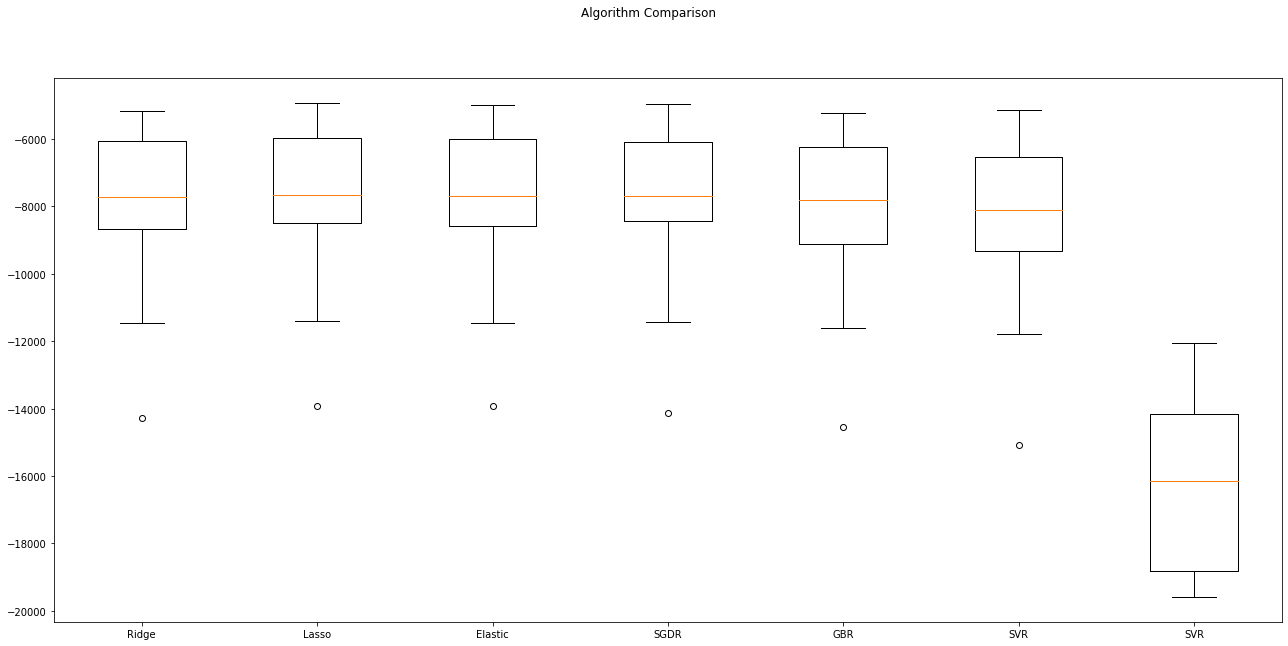

In [191]:
# Compare Algorithms
fig = plt.figure(figsize=(22,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Hyperparameter Tuning

In [192]:
# Linear is our best model
scoring = 'neg_mean_absolute_error'
model = Lasso()
scoring = 'neg_root_mean_squared_error'
parameters = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
grid = GridSearchCV(estimator=model,
			param_grid=parameters,scoring = scoring)
grid.fit(X_train, Y_train)
print('MAE: %.3f' % grid.best_score_)
print('\nBest params:\n', grid.best_params_)

MAE: -90.609

Best params:
 {'alpha': 0.03}


# RMSE Plot

87.7543459360431
8.064468579541366
8.064468579541366


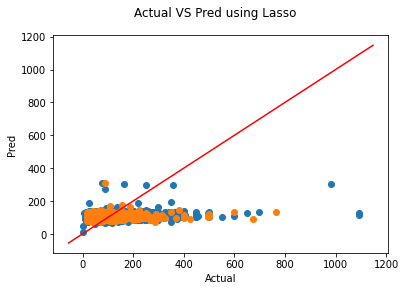

In [199]:
from sklearn.metrics import mean_absolute_error

grid.fit(X_train,Y_train)
Y_Training_Predictions = grid.predict(X_train)
Y_Testing_Predicitons= grid.predict(X_validation)
plt.scatter(x=Y_train, y=Y_Training_Predictions)
plt.scatter(x=Y_validation,y=Y_Testing_Predicitons)
plt.legend(title ='Legend', loc = 'upper left', labels = ['Train','Test'])
plt.suptitle("Actual VS Pred using Lasso")
# plt.title("RMSE= 2.69",loc='left')
plt.xlabel("Actual")
plt.ylabel("Pred")
X = np.linspace(*plt.xlim())
plt.plot(X, X, color='red')
RMSE = np.sqrt(mean_squared_error(Y_train,Y_Training_Predictions))
RMAE = np.sqrt(mean_absolute_error(Y_validation,Y_Testing_Predicitons))
MAE = np.sqrt(mean_absolute_error(Y_validation,Y_Testing_Predicitons))

print(RMSE)
print(RMAE)
print(MAE)


###Error Distribution

,Predictions,new_price,Error
0,100.202224,80.0,-20.202224
1,97.570265,NaN,NaN
2,117.252959,90.0,-27.252959
3,115.561283,NaN,NaN
4,111.685062,NaN,NaN
...,...,...,...
2154,NaN,20.0,NaN
1271,NaN,120.0,NaN
768,NaN,50.0,NaN
1730,NaN,144.0,NaN


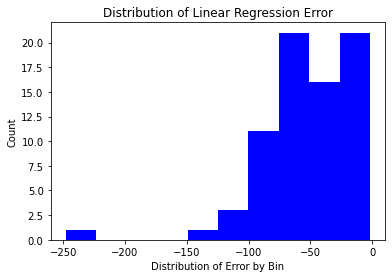

In [198]:
Y_Pred = pd.DataFrame(Y_Testing_Predicitons)
Y_Actuals = pd.DataFrame(Y_validation)

Y_Actuals = Y_Actuals.rename(columns = {0:'Actuals'})
Y_Pred = Y_Pred.rename(columns = {0:'Predictions'})

dataframe = pd.concat([Y_Pred,Y_Actuals], axis =1)

dataframe['Error'] = dataframe.new_price-dataframe.Predictions
sub = dataframe[(dataframe['Error'] < 4)]
plt.hist(sub['Error'], bins =10 , color = 'blue')
plt.title("Distribution of Linear Regression Error")
plt.xlabel("Distribution of Error by Bin")
plt.ylabel("Count")
dataframe 



In [207]:
Y_Testing_Predicitons= grid.predict(X_validation)
for i,g in zip(Y_validation,Y_Testing_Predicitons):
    print("actual price is = ",i,":predicted price = ",g)


actual price is =  30 :predicted price =  100.20222443613292
actual price is =  35 :predicted price =  97.57026480562703
actual price is =  495 :predicted price =  117.2529592063278
actual price is =  70 :predicted price =  115.5612834663212
actual price is =  89 :predicted price =  111.6850624594347
actual price is =  37 :predicted price =  110.20365010287107
actual price is =  60 :predicted price =  89.12682657973173
actual price is =  215 :predicted price =  89.12682657973173
actual price is =  100 :predicted price =  122.23358357889724
actual price is =  45 :predicted price =  107.8261488755498
actual price is =  60 :predicted price =  122.92542370966966
actual price is =  124 :predicted price =  105.4286785122658
actual price is =  65 :predicted price =  102.87309181843588
actual price is =  89 :predicted price =  110.09390066305069
actual price is =  200 :predicted price =  124.41197640491886
actual price is =  54 :predicted price =  99.46271171869137
actual price is =  189 :pred